In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [50]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [110]:
X, Y = make_blobs(n_samples=5000, centers=2, n_features=2)
X_train , X_test, y_train, y_test = train_test_split(X, Y, 
                                                     test_size=0.4, 
                                                     random_state=42)

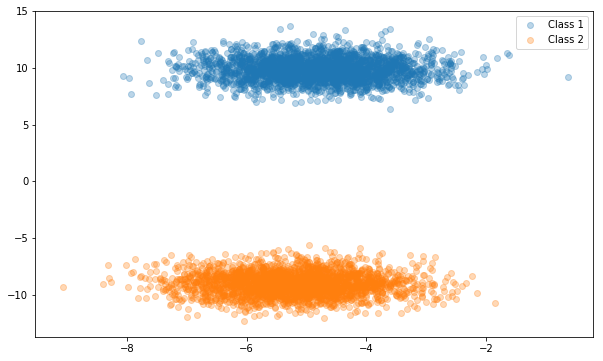

In [142]:
fig, ax = plt.subplots(figsize=(10,6))
for g in np.unique(Y):
    i = np.where(Y==g)
    ax.scatter(X[i,0], X[i,1], label = g, alpha=0.30)
ax.legend()
ax.legend(['Class 1', 'Class 2'])
plt.savefig("figures/gbm/1.png", dpi=100)
plt.show()

In [113]:
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X_train, y_train)
print('Accuracy for a single decision stump: {}'
      .format(clf.score(X_test, y_test)))


Accuracy for a single decision stump: 1.0


In [136]:
clf = GradientBoostingClassifier(n_estimators=5000, 
                                 learning_rate=0.01, 
                                 max_depth=5, 
                                 random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:,1]
print("Test logloss: {}".format(log_loss(y_test, y_pred)))

Test logloss: 0.0003139443130316775


In [137]:
def loss_function(y_true, scores_pred):
    return log_loss(y_true, sigmoid(scores_pred))

In [138]:
cumulative_preds = np.array([x for x in clf.staged_decision_function(X_test)])[:, :, 0]

In [139]:
print ("Log-loss using all trees:              {}".format(loss_function(y_test, cumulative_preds[-1, :])))
print ("Log-loss using all trees except last:  {}".format(loss_function(y_test, cumulative_preds[-2, :])))
print ("Log-loss using all trees except first: {}".format(loss_function(y_test, cumulative_preds[-1, :] - cumulative_preds[0, :])))

Log-loss using all trees:              0.0003139443130316775
Log-loss using all trees except last:  0.0003139443130315682
Log-loss using all trees except first: 0.000320177183039351


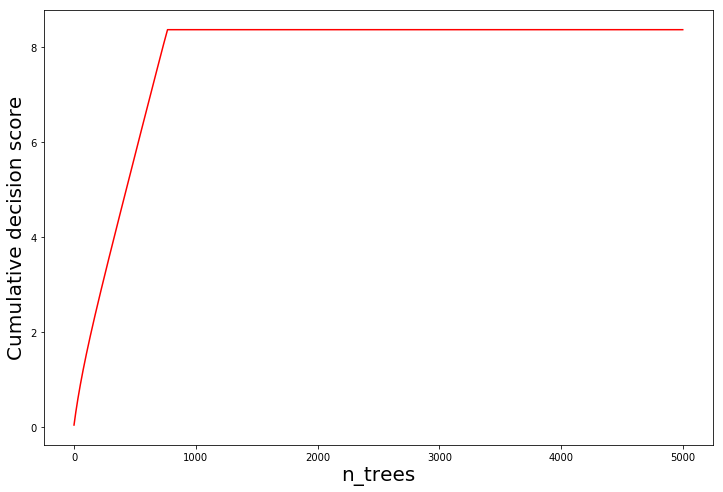

In [140]:
plt.figure(figsize=(12,8))
plt.plot(cum_preds[:, y_test == 1][:, 0],'r')

plt.xlabel('n_trees',fontsize=20)
plt.ylabel('Cumulative decision score', fontsize=20)
plt.savefig("figures/gbm/2.png", dpi=100);